In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# download files needed for nltk
nltk.download('punkt')
nltk.download('stopwords')

tweets_csv = pd.read_csv("tweets.csv")

tweets = tweets_csv["text"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
word_count = dict()

# Taken from https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

for index, tweet in tweets.iteritems():
    # No clue why, but this print statement has to be here or tweet.split() will throw an error
    print(tweet)
    words = nltk.word_tokenize(clean_tweet(tweet.lower()))
    filtered_words = [word for word in words if not word.lower() in stopwords.words('english')]
    for word in filtered_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?
Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ
RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)
RT @jww372: I don't have to guess your religion! #ChristmasAftermath
RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see

https://t.co/HjhPguBK1Y by @alisonrose711
@ModicaGiunta me, too!
RT @MDBlanchfield: You’ll never guess who tweeted something false that he saw on TV - The Washington Post https://t.co/K2e4XdXRfu
RT @100PercFEDUP: New post: WATCH: DIAMOND AND SILK Rip On John Kerry Over Israel Comments (VIDEO) https://t.co/NkdKaQ9yYu
RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH
One of the ways to remind that #BlackLivesMatter #BlackPressDay
RT @ElPenguinito: #myfarewellwordswould

In [9]:
filtered_count = {k:v for (k,v) in word_count.items() if len(k) > 2 and v >= 100}
sorted_count = sorted(filtered_count.items(), key=lambda x:x[1], reverse=True )

for key, count in sorted_count:
    print(key + " " + str(count))

trump 2092
n't 1017
clinton 873
hillary 813
amp 733
obama 671
people 534
... 441
like 408
new 404
get 368
donald 366
one 338
politics 336
news 334
via 310
america 283
president 278
tcot 270
https 270
make 256
would 246
vote 244
're 243
time 241
says 237
know 234
want 229
day 225
pjnet 220
black 217
election 215
see 214
think 210
good 206
maga 206
say 206
never 206
video 199
need 199
love 199
gop 196
media 194
campaign 192
right 188
take 175
going 172
let 171
world 166
life 166
got 166
white 165
back 163
man 160
first 159
still 156
really 151
support 149
great 148
today 148
could 146
said 145
country 145
police 145
stop 143
state 143
american 142
every 141
'll 138
watch 137
isis 136
bill 136
women 134
show 134
years 132
real 132
god 129
debate 129
https… 128
best 127
always 126
post 125
last 124
way 124
help 123
live 121
free 120
dnc 118
much 117
muslim 117
ccot 117
http… 115
ever 112
another 109
breaking 109
've 108
die 108
win 107
even 107
must 106
look 105
merkelmussbleiben 105
year 

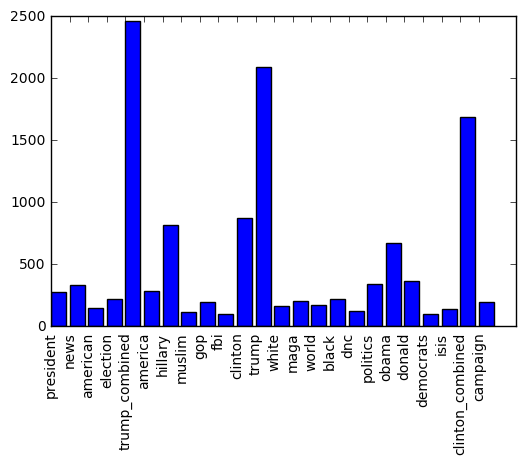

In [36]:
selected = {
    'trump' : filtered_count["trump"],
    'clinton' : filtered_count["clinton"],
    'hillary' : filtered_count["hillary"],
    'obama': filtered_count["obama"],
    'donald': filtered_count["donald"],
    'politics': filtered_count["politics"],
    'news': filtered_count["news"],
    'america': filtered_count["america"],
    'president': filtered_count["president"],
    'black': filtered_count["black"],
    'election': filtered_count["election"],
    'gop': filtered_count["gop"],
    'maga': filtered_count["maga"],
    'campaign': filtered_count["campaign"],
    'world': filtered_count["world"],
    'white': filtered_count["white"],
    'american': filtered_count["american"],
    'dnc': filtered_count["dnc"],
    'muslim': filtered_count["muslim"],
    'fbi': filtered_count["fbi"],
    'democrats': filtered_count["democrats"],
    'isis': filtered_count["isis"],
    'clinton_combined':filtered_count["hillary"] + filtered_count["clinton"],
    'trump_combined': filtered_count["trump"] + filtered_count["donald"]
}

plt.bar(range(len(selected)), selected.values())
plt.xticks(range(len(selected)), selected.keys(), rotation="vertical")
plt.show()

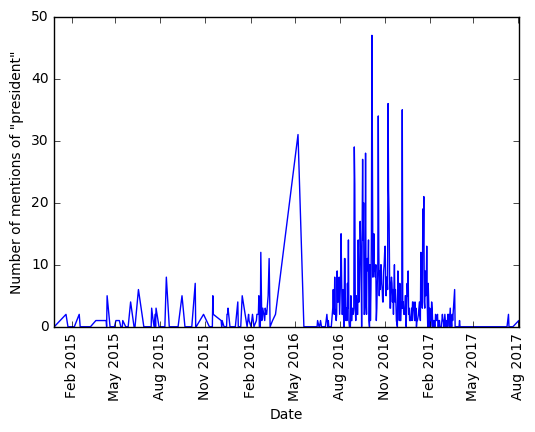

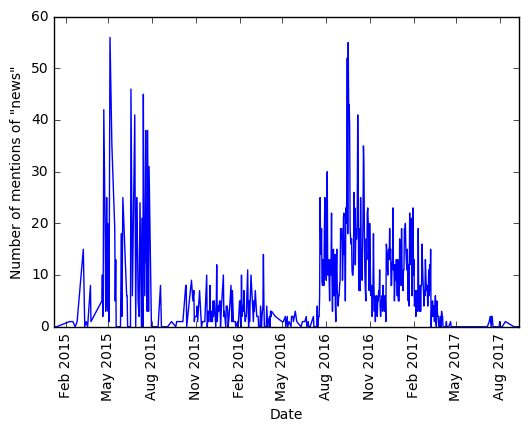

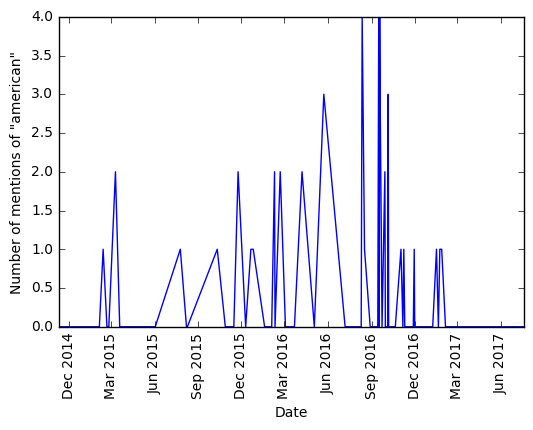

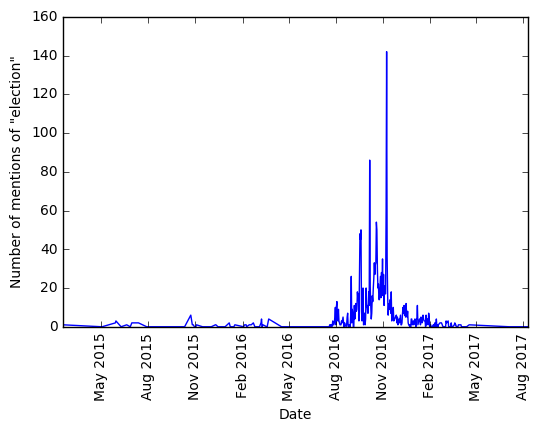

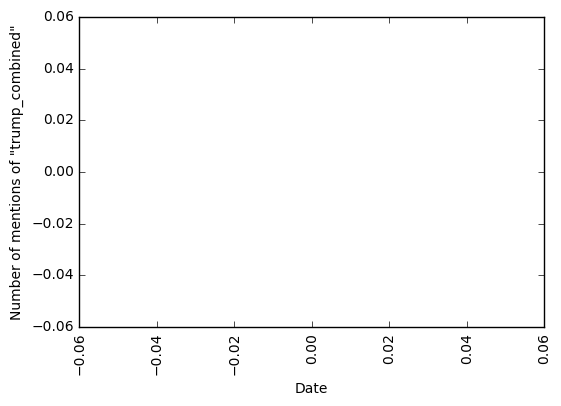

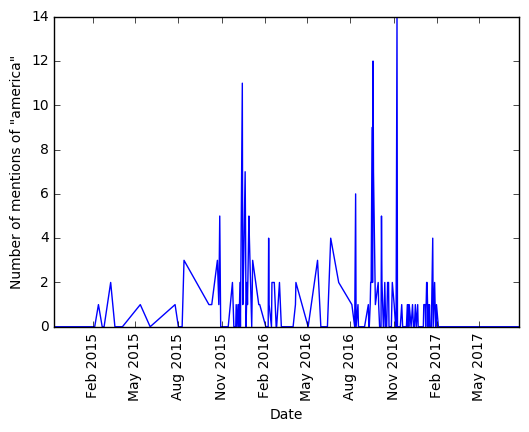

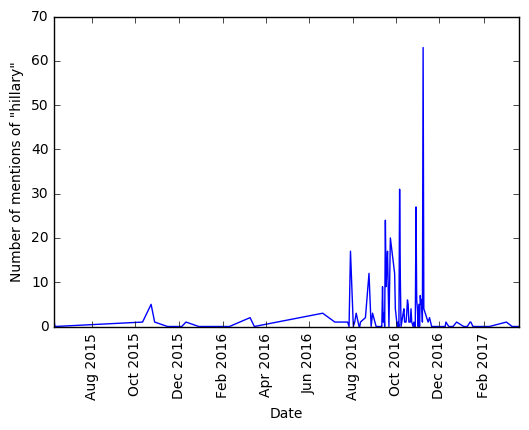

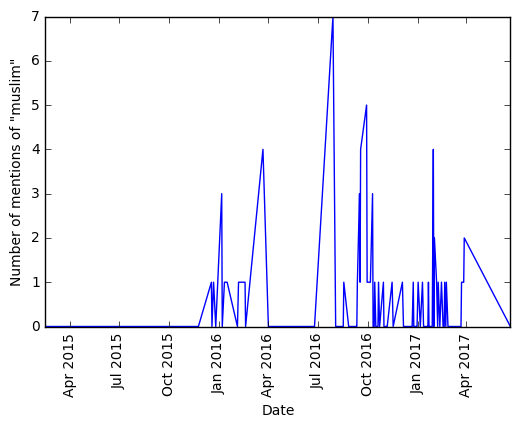

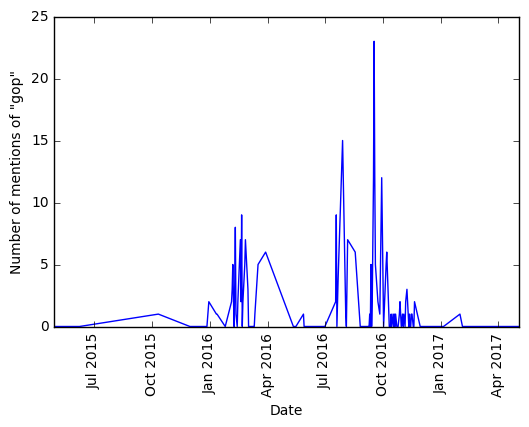

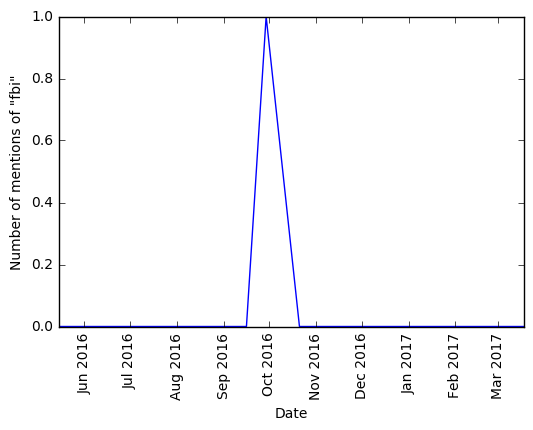

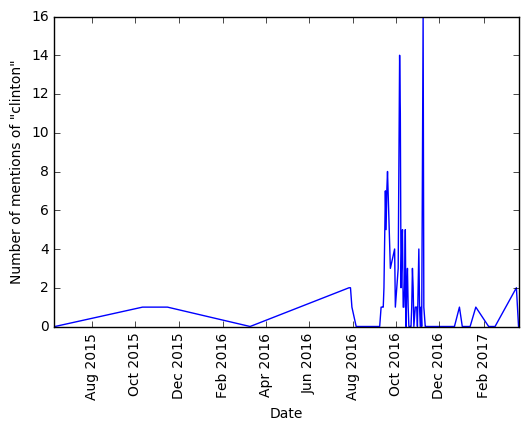

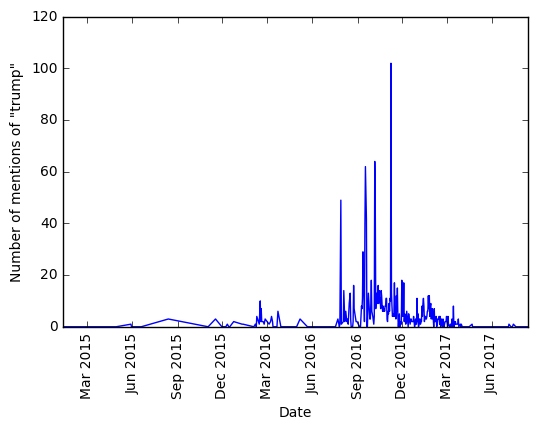

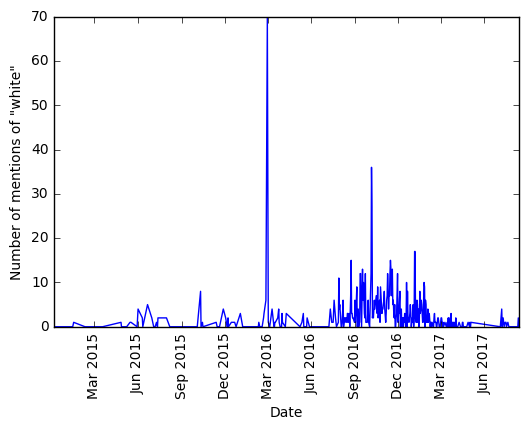

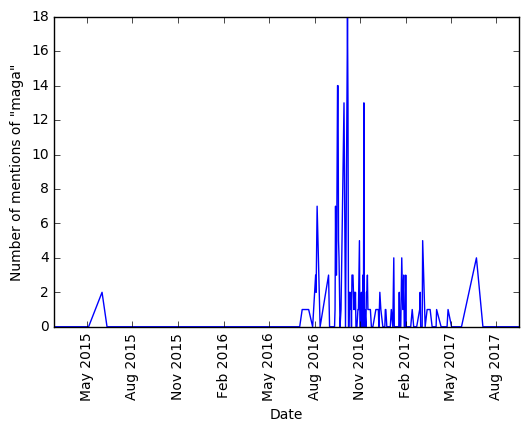

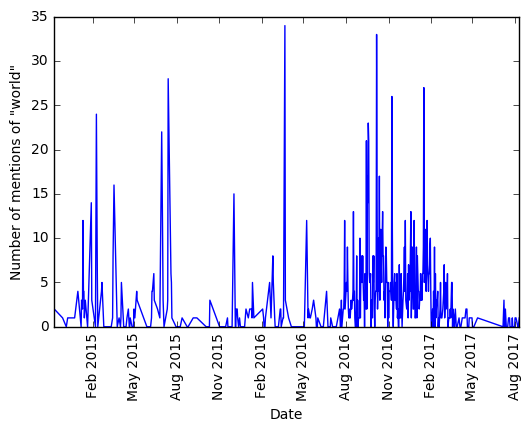

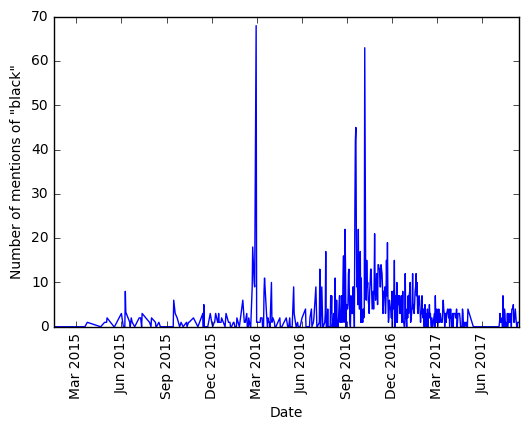

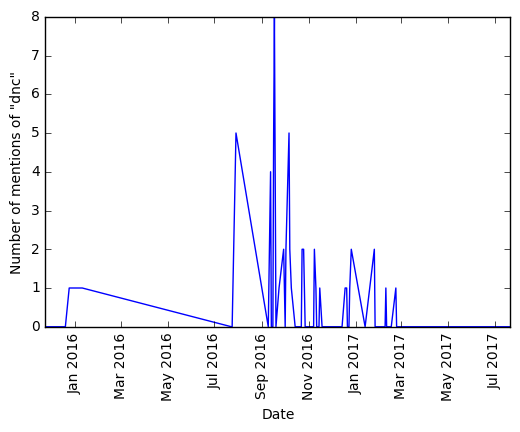

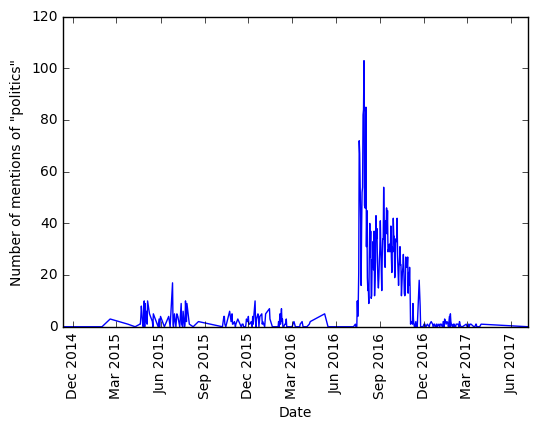

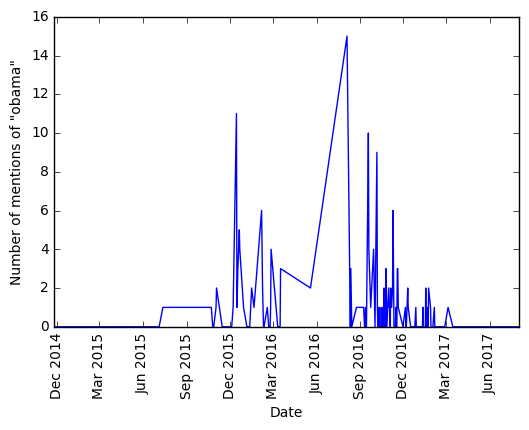

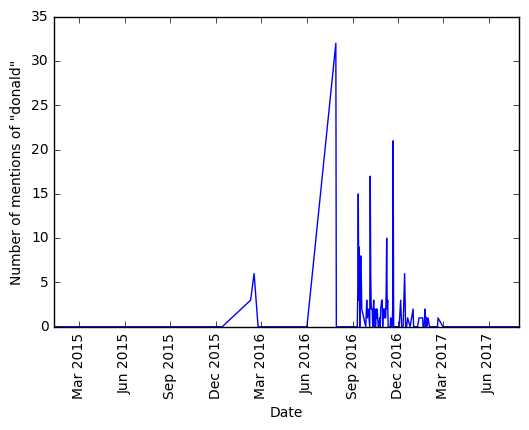

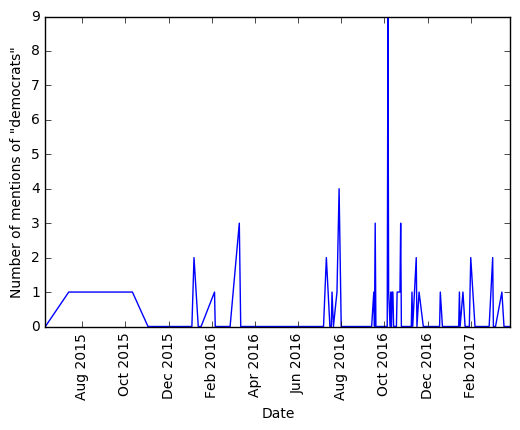

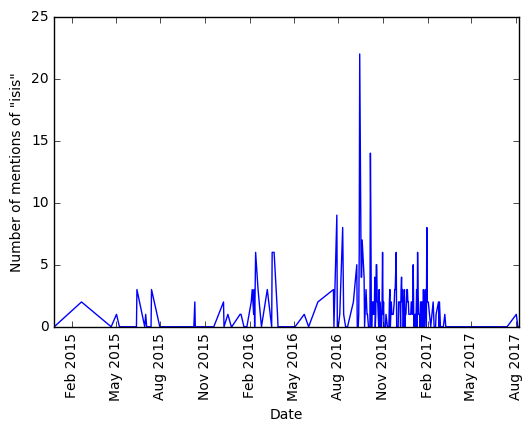

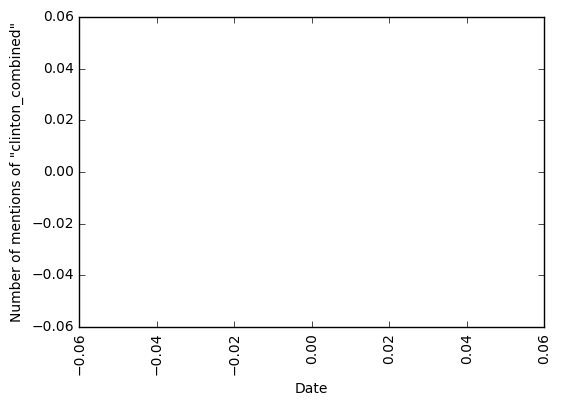

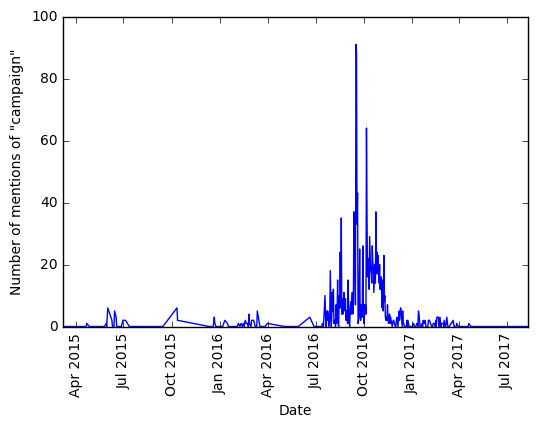

In [37]:
import datetime

def GetDates(word):
    datesFrame = tweets_csv[tweets_csv['text'].str.contains(word) == True]

    dateCount = dict()

    for index, date in datesFrame['created_str'].iteritems():
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
    
        if (sdate in dateCount):
            dateCount[sdate] += 1
        else:
            dateCount[sdate] = 0
        
    orderDateCount = sorted(dateCount.items(), key=lambda x:x[0], reverse=True)
    return orderDateCount

def PlotMentions(dates, word):
    x_val = [x[0] for x in dates]
    y_val = [x[1] for x in dates]
    
    plt.plot(x_val, y_val)
    plt.xticks(rotation=90)
    plt.ylabel("Number of mentions of \"" + word + "\"")
    plt.xlabel("Date")
    plt.show()
    
for word in selected.keys():
    PlotMentions(GetDates(word), word)

Mean: 0.0699463082432 variance: 0.0891141121521 Overall sentiment: 19.4450736916


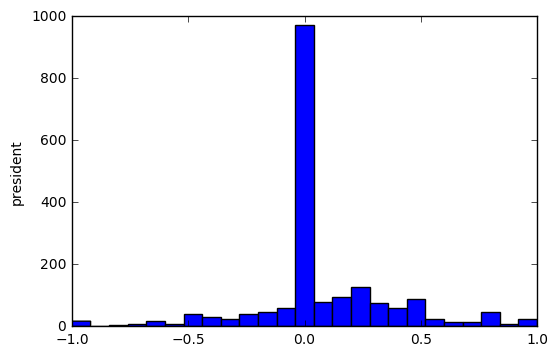

Mean: 0.0273249941977 variance: 0.0762494128439 Overall sentiment: 9.12654806203


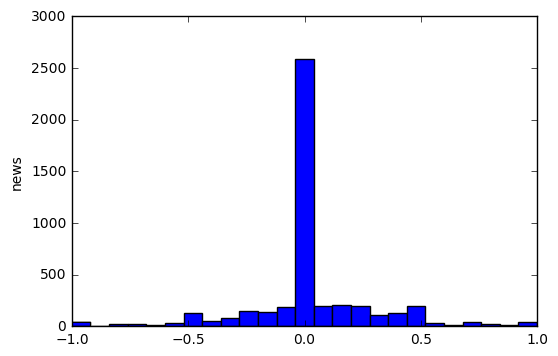

Mean: 0.0621108613609 variance: 0.0899583875841 Overall sentiment: 8.81974231324


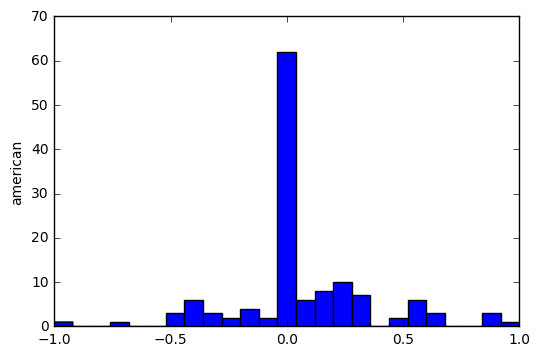

Mean: 0.0541610127221 variance: 0.0828773189392 Overall sentiment: 11.6446177353


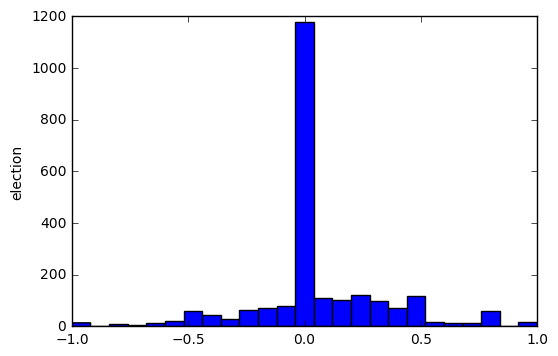

Mean: 0.0473541489554 variance: 0.083189292823 Overall sentiment: 13.4012241544


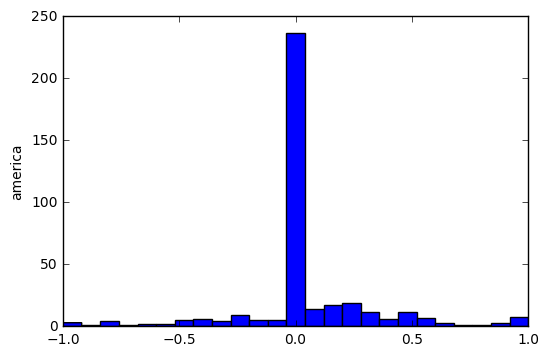

Mean: -0.00510796368483 variance: 0.0614424062715 Overall sentiment: -4.15277447577


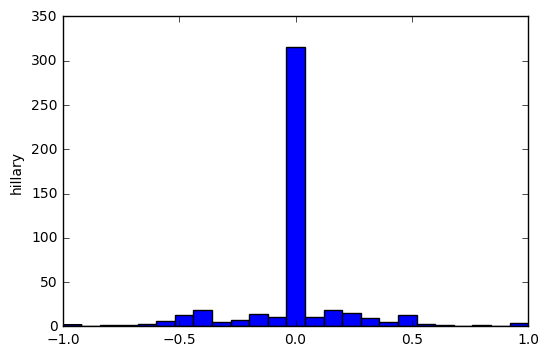

Mean: 0.0426941942312 variance: 0.097706573742 Overall sentiment: 4.99522072505


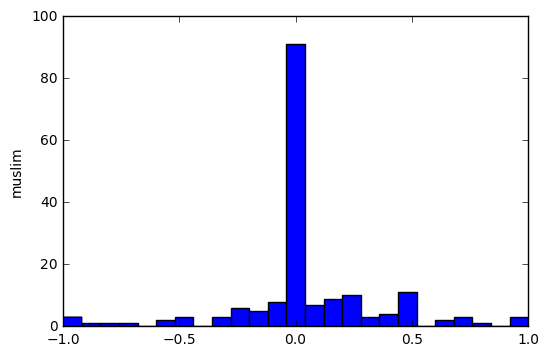

Mean: 0.00423971122941 variance: 0.0580907909018 Overall sentiment: 0.830983400965


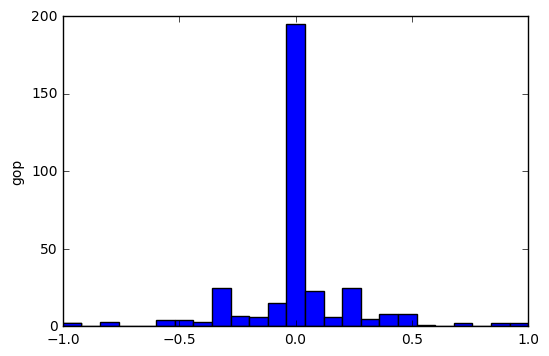

Mean: 0.024358974359 variance: 0.00712031558185 Overall sentiment: 2.46025641026


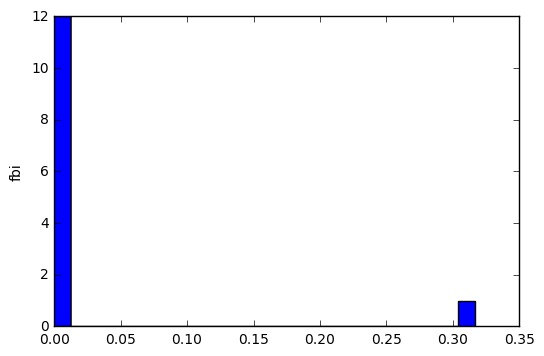

Mean: -0.00430743407225 variance: 0.0762407419994 Overall sentiment: -3.76038994507


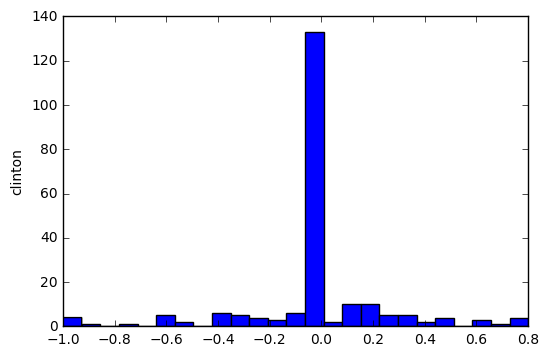

Mean: 0.0335026160767 variance: 0.0877670369665 Overall sentiment: 70.0874728324


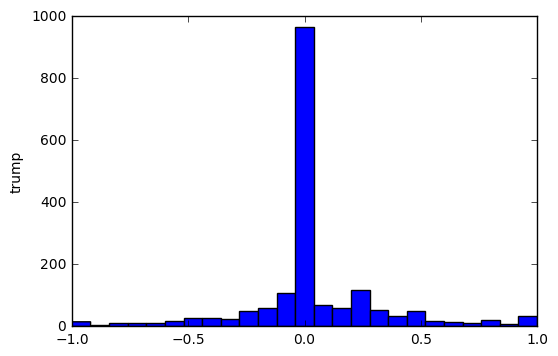

Mean: 0.0256641888567 variance: 0.0326241011702 Overall sentiment: 4.23459116135


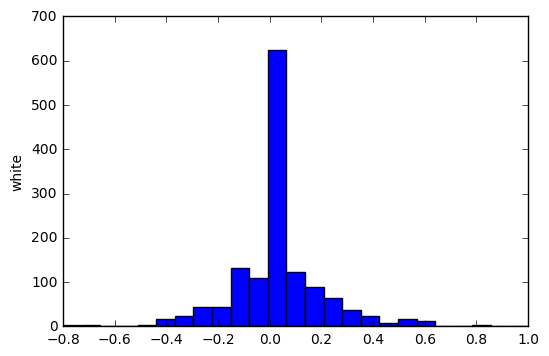

Mean: 0.0225372009928 variance: 0.0716883625495 Overall sentiment: 4.64266340453


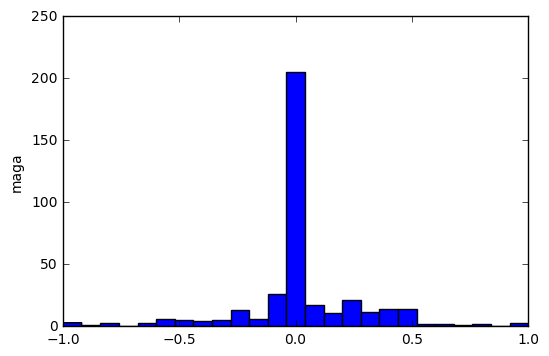

Mean: 0.0640483064672 variance: 0.0965376315034 Overall sentiment: 10.6320188736


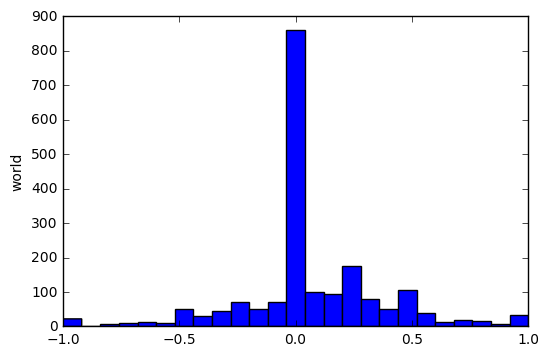

Mean: -0.0252278143633 variance: 0.0527790555829 Overall sentiment: -5.47443571684


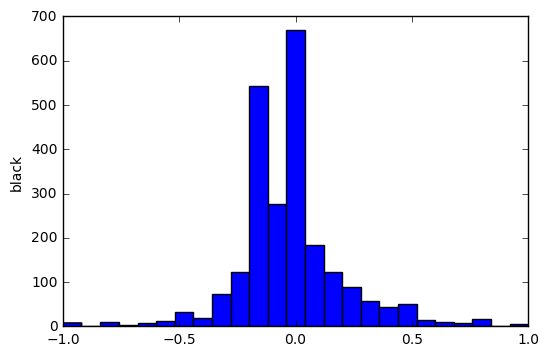

Mean: 0.061561255923 variance: 0.0814761911653 Overall sentiment: 7.26422819891


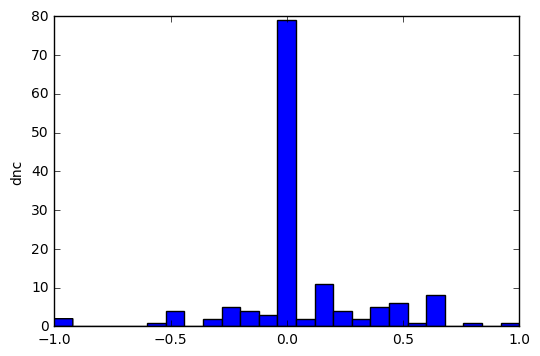

Mean: 0.0327178046622 variance: 0.05618439937 Overall sentiment: 10.9931823665


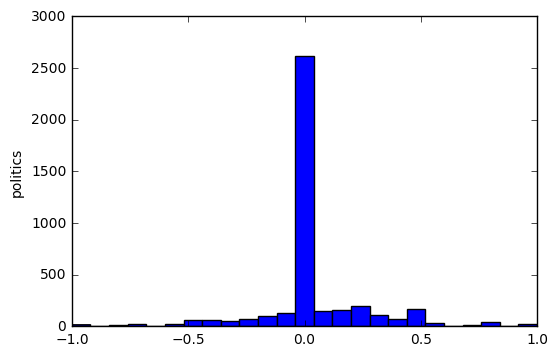

Mean: -0.00393458685328 variance: 0.0817188090441 Overall sentiment: -2.64010777855


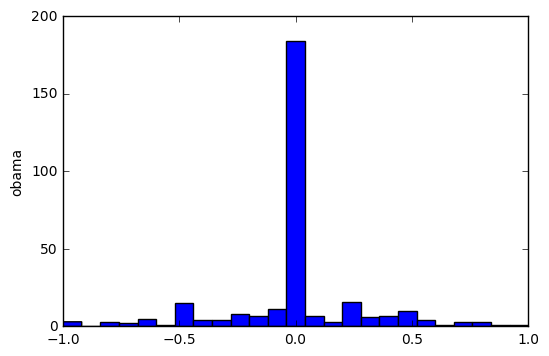

Mean: -0.0137801291459 variance: 0.0653155661408 Overall sentiment: -5.0435272674


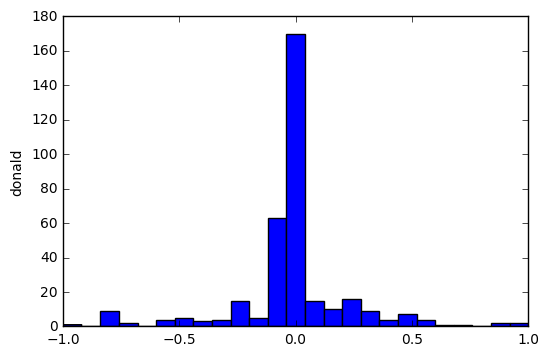

Mean: 0.0316275627872 variance: 0.104497092002 Overall sentiment: 3.16275627872


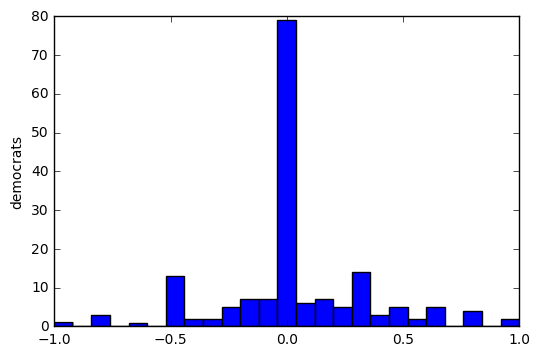

Mean: 0.00697984511959 variance: 0.0444630041957 Overall sentiment: 0.949258936264


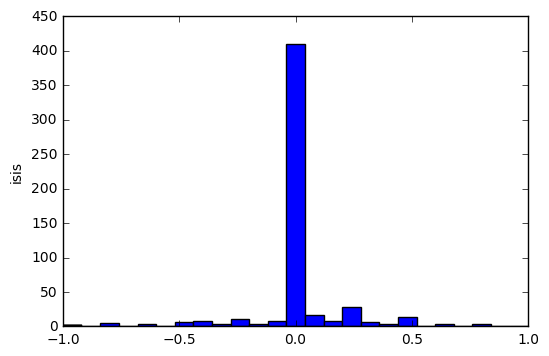

Mean: 0.0338086491773 variance: 0.0594018012741 Overall sentiment: 6.49126064204


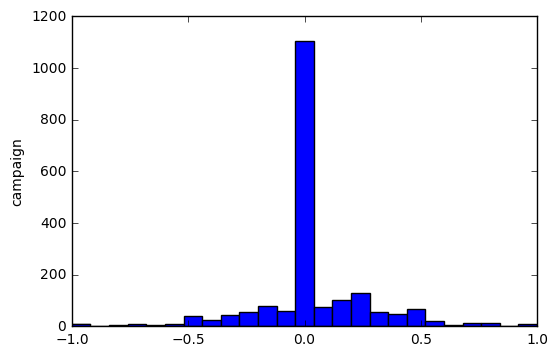

In [38]:
from textblob import TextBlob
                               
def sentiment(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def PlotSentiment(word):
    sent = sentiment(word)
    if (len(sent) != 0):
        print("Mean: " + str(np.mean(sent)) + " variance: " + str(np.var(sent)) + " Overall sentiment: " + str(np.mean(sent)*selected[word]))
        plt.hist(sent, bins=25)
        plt.ylabel(word)
        plt.show()

for word in selected:
    PlotSentiment(word)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.06227
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.803
Time:                        00:34:07   Log-Likelihood:                 12.674
No. Observations:                 384   AIC:                            -21.35
Df Residuals:                     382   BIC:                            -13.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0392      0.035      1.131      0.2

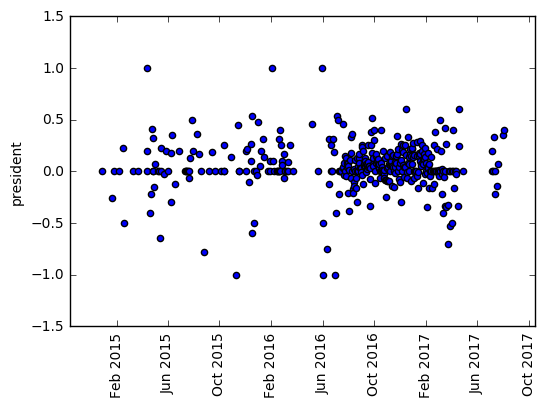

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 9.989e-06
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.997
Time:                        00:34:30   Log-Likelihood:                 88.359
No. Observations:                 517   AIC:                            -172.7
Df Residuals:                     515   BIC:                            -164.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0382      0.023      1.658      0.0

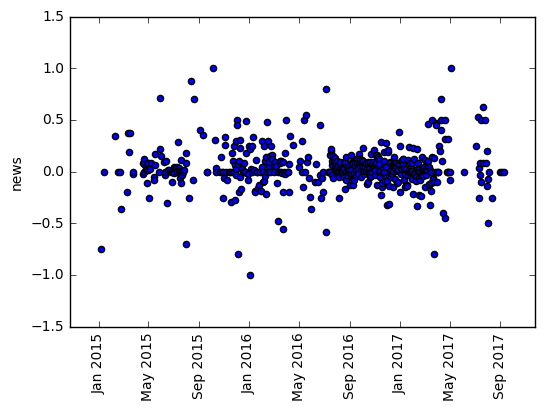

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.04244
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.837
Time:                        00:34:45   Log-Likelihood:                -14.138
No. Observations:                  85   AIC:                             32.28
Df Residuals:                      83   BIC:                             37.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0348      0.087      0.401      0.6

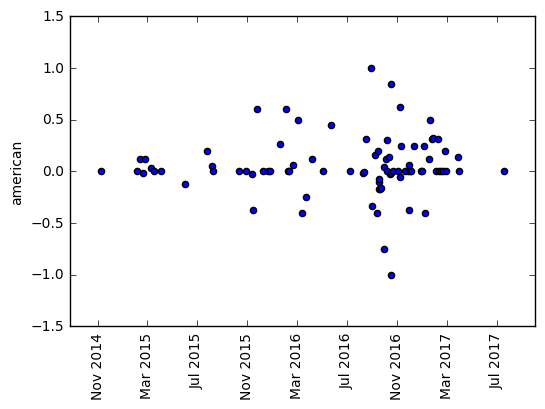

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.869
Date:                Thu, 26 Apr 2018   Prob (F-statistic):            0.00536
Time:                        00:34:52   Log-Likelihood:                 38.941
No. Observations:                 299   AIC:                            -73.88
Df Residuals:                     297   BIC:                            -66.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1851      0.045      4.134      0.0

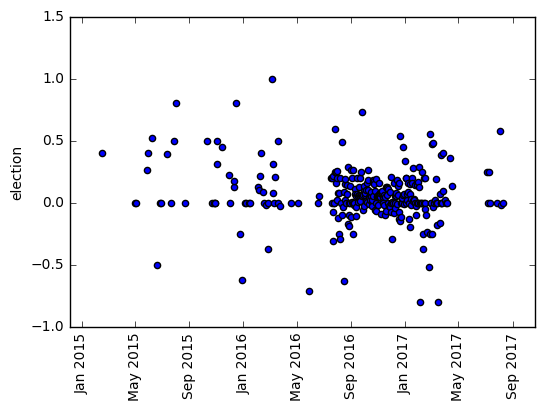

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3745
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.541
Time:                        00:34:58   Log-Likelihood:                -22.999
No. Observations:                 192   AIC:                             50.00
Df Residuals:                     190   BIC:                             56.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0740      0.060      1.233      0.2

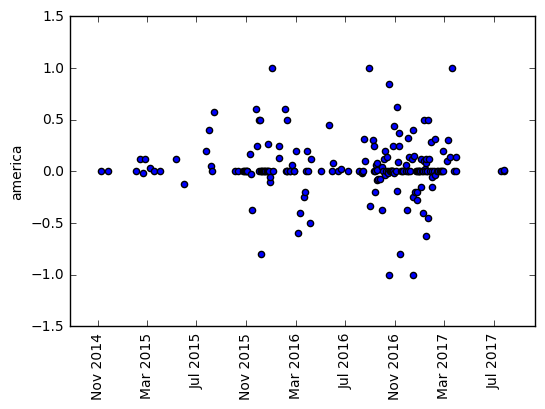

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.810
Date:                Thu, 26 Apr 2018   Prob (F-statistic):             0.0967
Time:                        00:35:00   Log-Likelihood:                 32.351
No. Observations:                 105   AIC:                            -60.70
Df Residuals:                     103   BIC:                            -55.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0904      0.066     -1.361      0.1

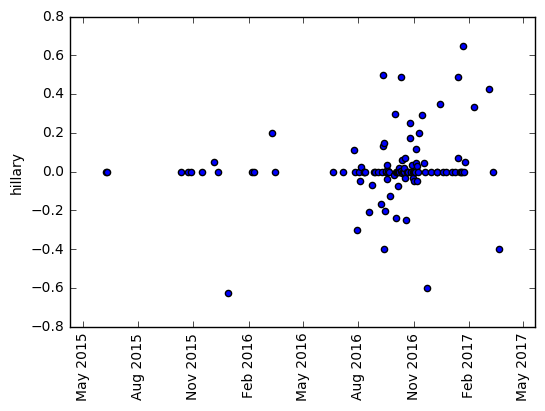

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.887
Date:                Thu, 26 Apr 2018   Prob (F-statistic):             0.0170
Time:                        00:35:02   Log-Likelihood:                -10.365
No. Observations:                 105   AIC:                             24.73
Df Residuals:                     103   BIC:                             30.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1975      0.099     -1.994      0.0

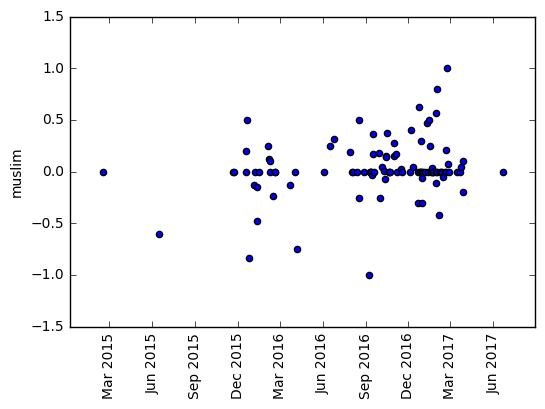

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7632
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.384
Time:                        00:35:03   Log-Likelihood:                 21.260
No. Observations:                 115   AIC:                            -38.52
Df Residuals:                     113   BIC:                            -33.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0592      0.064      0.929      0.3

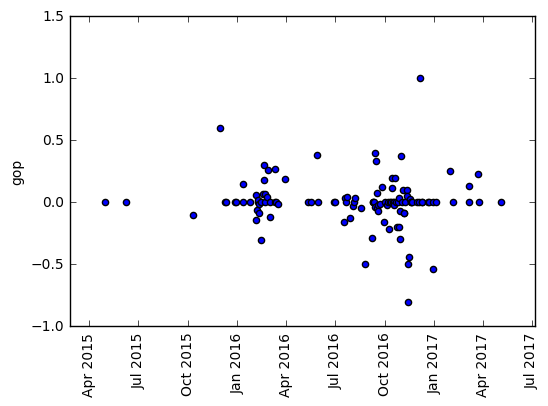

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     7.502
Date:                Thu, 26 Apr 2018   Prob (F-statistic):             0.0209
Time:                        00:35:04   Log-Likelihood:                 15.562
No. Observations:                  12   AIC:                            -27.12
Df Residuals:                      10   BIC:                            -26.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1508      0.050      3.016      0.0

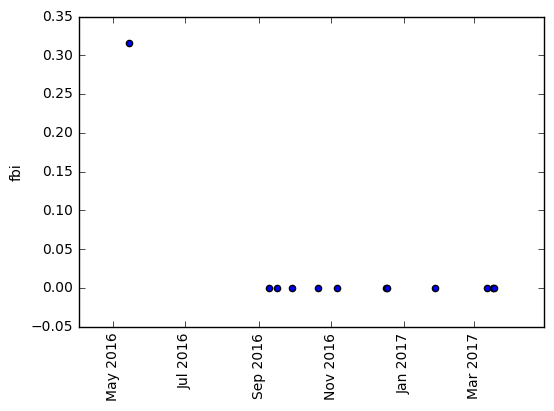

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.047
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.309
Time:                        00:35:05   Log-Likelihood:                 14.155
No. Observations:                  78   AIC:                            -24.31
Df Residuals:                      76   BIC:                            -19.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0991      0.101      0.978      0.3

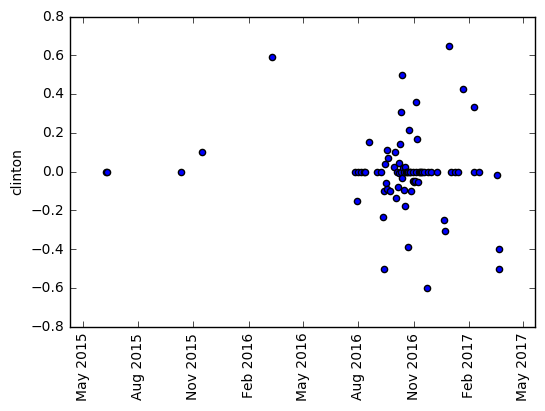

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.436
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.232
Time:                        00:35:09   Log-Likelihood:                 52.155
No. Observations:                 290   AIC:                            -100.3
Df Residuals:                     288   BIC:                            -92.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.049      1.767      0.0

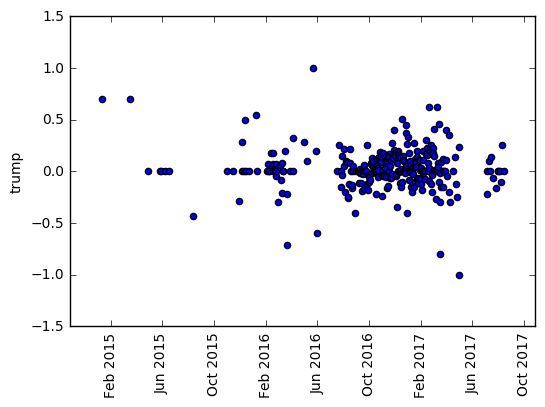

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     11.63
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           0.000721
Time:                        00:35:16   Log-Likelihood:                 217.87
No. Observations:                 363   AIC:                            -431.7
Df Residuals:                     361   BIC:                            -423.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0949      0.023      4.084      0.0

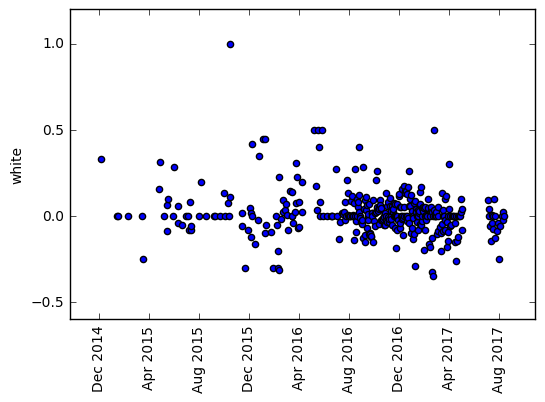

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5709
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.451
Time:                        00:35:20   Log-Likelihood:                 5.2342
No. Observations:                 158   AIC:                            -6.468
Df Residuals:                     156   BIC:                           -0.3432
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0321      0.093     -0.344      0.7

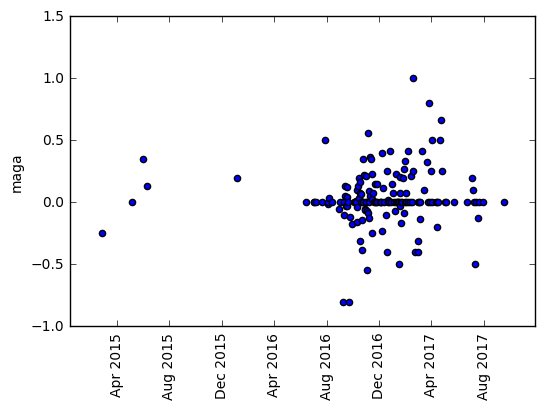

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6484
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.421
Time:                        00:35:25   Log-Likelihood:                 46.732
No. Observations:                 440   AIC:                            -89.46
Df Residuals:                     438   BIC:                            -81.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0536      0.026      2.045      0.0

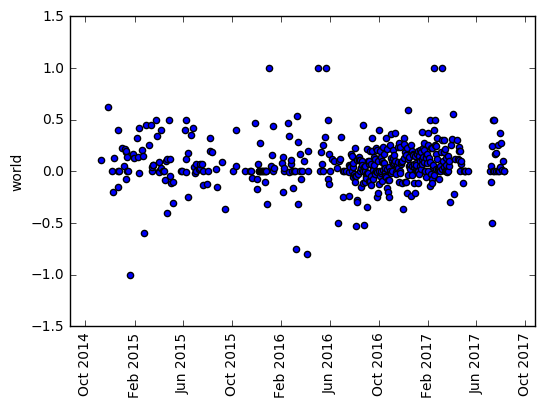

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.709
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.100
Time:                        00:35:35   Log-Likelihood:                 216.34
No. Observations:                 473   AIC:                            -428.7
Df Residuals:                     471   BIC:                            -420.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0472      0.021     -2.257      0.0

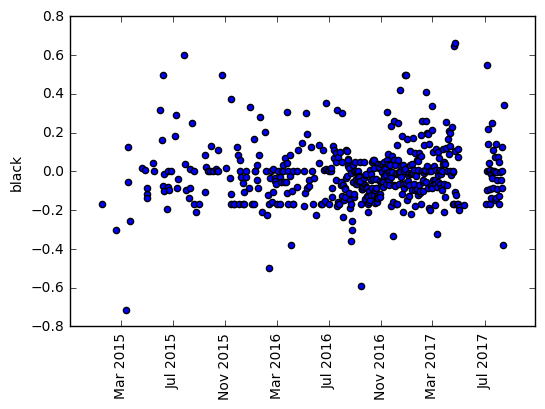

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5375
Date:                Thu, 26 Apr 2018   Prob (F-statistic):              0.466
Time:                        00:35:41   Log-Likelihood:                -14.507
No. Observations:                  82   AIC:                             33.01
Df Residuals:                      80   BIC:                             37.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1436      0.119      1.204      0.2

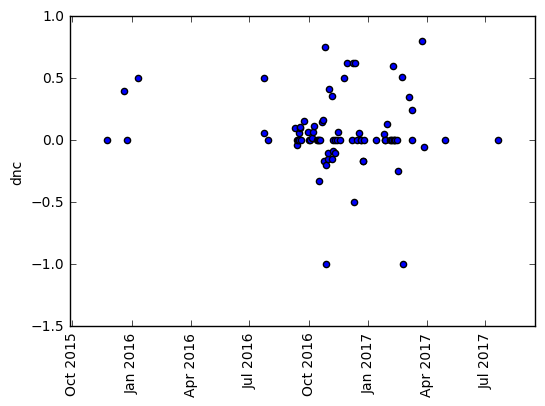

In [ ]:
from statsmodels.regression.linear_model import OLS
# TODO: Fit a line to each plot to look for trends over time and plot residuals to make sure the model is valid

def sentiment(word, df):
    tweets = df[df['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def SentimentWithTime(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
    
    sent = dict()
    
    for index, date in tweets['created_str'].iteritems():
        sameDate = tweets[tweets['created_str'].str[0:10] ==(date[0:10])]
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
        if (sdate not in sent):
            sent[sdate] = np.mean(sentiment(word, sameDate))
    
    return sent

def PlotSentimentWithTime(word):
    sent = SentimentWithTime(word)
    
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(sent) != 0):
        x_val = [x[0] for x in ordered_sent]
        y_val = [x[1] for x in ordered_sent]
        print("Mean: " + str(np.mean(y_val)) + " variance: " + str(np.var(y_val)))
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel(word)
        plt.show()
        
def RegressWord(word):
    sent = SentimentWithTime(word)
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(ordered_sent) > 0):
        time0 = ordered_sent[0][0]
    
        X = np.ones(shape=(len(ordered_sent), 2))
        for i in range(0, len(ordered_sent)):
            X[i, 1] = (ordered_sent[i][0] - time0).days
        
        y = np.array([x[1] for x in ordered_sent])
    
        model = OLS(y, X)
        fit = model.fit()
        print(fit.summary())

for word in selected:
    RegressWord(word)
    PlotSentimentWithTime(word)